## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  24.174360   950.958680  0.061989   8.534824  1.099912
1  66.537406   332.575569  0.892821   4.563404  1.356148
2  46.785213  1042.669344  0.303990  10.578786  1.413519
3  58.400963  1248.685927  0.552594   1.515043  1.489629
4  39.766740   164.998938  0.456153   8.934899  0.999282


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.26779 | train_mse: 4.53023 | train_mae: 1.50589 |  0:00:00s
epoch 1  | loss: 0.85096 | train_mse: 3.25992 | train_mae: 1.39857 |  0:00:00s
epoch 2  | loss: 0.38987 | train_mse: 1.79503 | train_mae: 1.00472 |  0:00:00s


epoch 3  | loss: 0.3311  | train_mse: 1.11722 | train_mae: 0.82871 |  0:00:00s
epoch 4  | loss: 0.49987 | train_mse: 0.85189 | train_mae: 0.70222 |  0:00:00s
epoch 5  | loss: 0.34558 | train_mse: 0.92005 | train_mae: 0.72511 |  0:00:00s


epoch 6  | loss: 0.2669  | train_mse: 0.82821 | train_mae: 0.65061 |  0:00:00s
epoch 7  | loss: 0.32559 | train_mse: 0.74434 | train_mae: 0.60664 |  0:00:00s
epoch 8  | loss: 0.28173 | train_mse: 0.66813 | train_mae: 0.59312 |  0:00:00s


epoch 9  | loss: 0.2732  | train_mse: 0.70007 | train_mae: 0.61899 |  0:00:00s
epoch 10 | loss: 0.25518 | train_mse: 0.68729 | train_mae: 0.65334 |  0:00:01s
epoch 11 | loss: 0.27276 | train_mse: 1.13447 | train_mae: 0.78599 |  0:00:01s


epoch 12 | loss: 0.30949 | train_mse: 1.20186 | train_mae: 0.81835 |  0:00:01s
epoch 13 | loss: 0.29813 | train_mse: 1.4954  | train_mae: 0.88121 |  0:00:01s
epoch 14 | loss: 0.21214 | train_mse: 1.1406  | train_mae: 0.7615  |  0:00:01s


epoch 15 | loss: 0.31417 | train_mse: 0.77014 | train_mae: 0.61008 |  0:00:01s
epoch 16 | loss: 0.31411 | train_mse: 0.6285  | train_mae: 0.55916 |  0:00:01s
epoch 17 | loss: 0.28795 | train_mse: 0.9049  | train_mae: 0.68954 |  0:00:01s


epoch 18 | loss: 0.30478 | train_mse: 0.87933 | train_mae: 0.67095 |  0:00:01s
epoch 19 | loss: 0.20758 | train_mse: 0.65468 | train_mae: 0.58159 |  0:00:01s
epoch 20 | loss: 0.24401 | train_mse: 0.48537 | train_mae: 0.5101  |  0:00:01s


epoch 21 | loss: 0.20787 | train_mse: 0.49848 | train_mae: 0.51442 |  0:00:01s
epoch 22 | loss: 0.18613 | train_mse: 0.40001 | train_mae: 0.45495 |  0:00:02s
epoch 23 | loss: 0.20616 | train_mse: 0.39634 | train_mae: 0.42054 |  0:00:02s


epoch 24 | loss: 0.19823 | train_mse: 0.41366 | train_mae: 0.4468  |  0:00:02s
epoch 25 | loss: 0.23421 | train_mse: 0.35942 | train_mae: 0.44475 |  0:00:02s


epoch 26 | loss: 0.18149 | train_mse: 0.26541 | train_mae: 0.38927 |  0:00:02s
epoch 27 | loss: 0.1963  | train_mse: 0.26793 | train_mae: 0.38583 |  0:00:02s
epoch 28 | loss: 0.17059 | train_mse: 0.22946 | train_mae: 0.35366 |  0:00:02s


epoch 29 | loss: 0.17825 | train_mse: 0.25741 | train_mae: 0.37223 |  0:00:02s
epoch 30 | loss: 0.21675 | train_mse: 0.31499 | train_mae: 0.40325 |  0:00:02s
epoch 31 | loss: 0.32437 | train_mse: 0.29644 | train_mae: 0.37658 |  0:00:02s
epoch 32 | loss: 0.29029 | train_mse: 0.29252 | train_mae: 0.36899 |  0:00:02s


epoch 33 | loss: 0.2014  | train_mse: 0.22793 | train_mae: 0.33928 |  0:00:03s
epoch 34 | loss: 0.18987 | train_mse: 0.2458  | train_mae: 0.37092 |  0:00:03s
epoch 35 | loss: 0.23068 | train_mse: 0.3497  | train_mae: 0.43183 |  0:00:03s
epoch 36 | loss: 0.16259 | train_mse: 0.29267 | train_mae: 0.40536 |  0:00:03s


epoch 37 | loss: 0.147   | train_mse: 0.29661 | train_mae: 0.40527 |  0:00:03s
epoch 38 | loss: 0.16047 | train_mse: 0.27227 | train_mae: 0.38398 |  0:00:03s
epoch 39 | loss: 0.22654 | train_mse: 0.23405 | train_mae: 0.36674 |  0:00:03s
epoch 40 | loss: 0.12519 | train_mse: 0.17704 | train_mae: 0.31176 |  0:00:03s


epoch 41 | loss: 0.10775 | train_mse: 0.14403 | train_mae: 0.26929 |  0:00:03s
epoch 42 | loss: 0.12402 | train_mse: 0.13023 | train_mae: 0.25919 |  0:00:03s
epoch 43 | loss: 0.13798 | train_mse: 0.12133 | train_mae: 0.26646 |  0:00:03s


epoch 44 | loss: 0.0924  | train_mse: 0.11248 | train_mae: 0.26562 |  0:00:03s
epoch 45 | loss: 0.15425 | train_mse: 0.10161 | train_mae: 0.25256 |  0:00:03s
epoch 46 | loss: 0.16026 | train_mse: 0.10258 | train_mae: 0.24864 |  0:00:03s
epoch 47 | loss: 0.13359 | train_mse: 0.12831 | train_mae: 0.27053 |  0:00:04s


epoch 48 | loss: 0.34359 | train_mse: 0.16213 | train_mae: 0.29813 |  0:00:04s
epoch 49 | loss: 0.27218 | train_mse: 0.16125 | train_mae: 0.29369 |  0:00:04s
epoch 50 | loss: 0.18909 | train_mse: 0.11064 | train_mae: 0.2473  |  0:00:04s


epoch 51 | loss: 0.13905 | train_mse: 0.1333  | train_mae: 0.27675 |  0:00:04s
epoch 52 | loss: 0.17723 | train_mse: 0.13864 | train_mae: 0.28761 |  0:00:04s
epoch 53 | loss: 0.28837 | train_mse: 0.11788 | train_mae: 0.25876 |  0:00:04s
epoch 54 | loss: 0.21001 | train_mse: 0.08859 | train_mae: 0.22611 |  0:00:04s


epoch 55 | loss: 0.14614 | train_mse: 0.08396 | train_mae: 0.21663 |  0:00:04s
epoch 56 | loss: 0.10987 | train_mse: 0.08115 | train_mae: 0.21734 |  0:00:04s
epoch 57 | loss: 0.12015 | train_mse: 0.07937 | train_mae: 0.21275 |  0:00:04s


epoch 58 | loss: 0.11461 | train_mse: 0.07597 | train_mae: 0.20921 |  0:00:04s
epoch 59 | loss: 0.10843 | train_mse: 0.07305 | train_mae: 0.20739 |  0:00:04s
epoch 60 | loss: 0.10439 | train_mse: 0.0768  | train_mae: 0.21278 |  0:00:04s


epoch 61 | loss: 0.12068 | train_mse: 0.06213 | train_mae: 0.19502 |  0:00:05s
epoch 62 | loss: 0.15969 | train_mse: 0.06196 | train_mae: 0.19965 |  0:00:05s
epoch 63 | loss: 0.12952 | train_mse: 0.05346 | train_mae: 0.18644 |  0:00:05s
epoch 64 | loss: 0.11933 | train_mse: 0.05169 | train_mae: 0.18461 |  0:00:05s


epoch 65 | loss: 0.19227 | train_mse: 0.0873  | train_mae: 0.23644 |  0:00:05s
epoch 66 | loss: 0.12246 | train_mse: 0.07271 | train_mae: 0.21691 |  0:00:05s
epoch 67 | loss: 0.10699 | train_mse: 0.05401 | train_mae: 0.18803 |  0:00:05s
epoch 68 | loss: 0.27259 | train_mse: 0.05928 | train_mae: 0.1957  |  0:00:05s


epoch 69 | loss: 0.11893 | train_mse: 0.0516  | train_mae: 0.18452 |  0:00:05s
epoch 70 | loss: 0.25883 | train_mse: 0.08173 | train_mae: 0.22756 |  0:00:05s
epoch 71 | loss: 0.24349 | train_mse: 0.16559 | train_mae: 0.31543 |  0:00:05s


epoch 72 | loss: 0.15821 | train_mse: 0.18011 | train_mae: 0.31681 |  0:00:05s
epoch 73 | loss: 0.13368 | train_mse: 0.14099 | train_mae: 0.27799 |  0:00:05s
epoch 74 | loss: 0.24253 | train_mse: 0.13343 | train_mae: 0.27675 |  0:00:05s
epoch 75 | loss: 0.11106 | train_mse: 0.09578 | train_mae: 0.24012 |  0:00:05s


epoch 76 | loss: 0.20158 | train_mse: 0.08253 | train_mae: 0.23239 |  0:00:06s
epoch 77 | loss: 0.23912 | train_mse: 0.08719 | train_mae: 0.23293 |  0:00:06s
epoch 78 | loss: 0.11451 | train_mse: 0.0671  | train_mae: 0.20712 |  0:00:06s
epoch 79 | loss: 0.14468 | train_mse: 0.06239 | train_mae: 0.20202 |  0:00:06s


epoch 80 | loss: 0.11555 | train_mse: 0.06177 | train_mae: 0.20412 |  0:00:06s
epoch 81 | loss: 0.08477 | train_mse: 0.07162 | train_mae: 0.21822 |  0:00:06s
epoch 82 | loss: 0.07534 | train_mse: 0.09066 | train_mae: 0.23145 |  0:00:06s


epoch 83 | loss: 0.12316 | train_mse: 0.08014 | train_mae: 0.22046 |  0:00:06s
epoch 84 | loss: 0.07352 | train_mse: 0.05674 | train_mae: 0.19109 |  0:00:06s
epoch 85 | loss: 0.10537 | train_mse: 0.05345 | train_mae: 0.19247 |  0:00:06s
epoch 86 | loss: 0.11699 | train_mse: 0.0606  | train_mae: 0.20501 |  0:00:06s


epoch 87 | loss: 0.07123 | train_mse: 0.07866 | train_mae: 0.22781 |  0:00:06s
epoch 88 | loss: 0.08922 | train_mse: 0.09758 | train_mae: 0.24149 |  0:00:06s
epoch 89 | loss: 0.07805 | train_mse: 0.11371 | train_mae: 0.25325 |  0:00:06s
epoch 90 | loss: 0.14134 | train_mse: 0.10125 | train_mae: 0.2481  |  0:00:07s


epoch 91 | loss: 0.07425 | train_mse: 0.10912 | train_mae: 0.25077 |  0:00:07s
epoch 92 | loss: 0.1267  | train_mse: 0.11129 | train_mae: 0.2548  |  0:00:07s
epoch 93 | loss: 0.07991 | train_mse: 0.07434 | train_mae: 0.20858 |  0:00:07s
epoch 94 | loss: 0.10499 | train_mse: 0.0502  | train_mae: 0.17615 |  0:00:07s


epoch 95 | loss: 0.11196 | train_mse: 0.04536 | train_mae: 0.16369 |  0:00:07s
epoch 96 | loss: 0.06922 | train_mse: 0.03985 | train_mae: 0.16187 |  0:00:07s
epoch 97 | loss: 0.12766 | train_mse: 0.03919 | train_mae: 0.16021 |  0:00:07s


epoch 98 | loss: 0.1285  | train_mse: 0.04048 | train_mae: 0.15851 |  0:00:07s
epoch 99 | loss: 0.10534 | train_mse: 0.0437  | train_mae: 0.16707 |  0:00:07s
epoch 100| loss: 0.18436 | train_mse: 0.04361 | train_mae: 0.17196 |  0:00:07s
epoch 101| loss: 0.09275 | train_mse: 0.04316 | train_mae: 0.15959 |  0:00:07s


epoch 102| loss: 0.19939 | train_mse: 0.06037 | train_mae: 0.19319 |  0:00:07s
epoch 103| loss: 0.09079 | train_mse: 0.06345 | train_mae: 0.20225 |  0:00:07s
epoch 104| loss: 0.05393 | train_mse: 0.06424 | train_mae: 0.20731 |  0:00:07s
epoch 105| loss: 0.15418 | train_mse: 0.05552 | train_mae: 0.1907  |  0:00:08s


epoch 106| loss: 0.06216 | train_mse: 0.07155 | train_mae: 0.2128  |  0:00:08s
epoch 107| loss: 0.06758 | train_mse: 0.1002  | train_mae: 0.24274 |  0:00:08s
epoch 108| loss: 0.06938 | train_mse: 0.08314 | train_mae: 0.22149 |  0:00:08s
epoch 109| loss: 0.20346 | train_mse: 0.08938 | train_mae: 0.23462 |  0:00:08s


epoch 110| loss: 0.07209 | train_mse: 0.0548  | train_mae: 0.1866  |  0:00:08s
epoch 111| loss: 0.14596 | train_mse: 0.03966 | train_mae: 0.16188 |  0:00:08s
epoch 112| loss: 0.07547 | train_mse: 0.04342 | train_mae: 0.16622 |  0:00:08s
epoch 113| loss: 0.07476 | train_mse: 0.04827 | train_mae: 0.17492 |  0:00:08s


epoch 114| loss: 0.09131 | train_mse: 0.04943 | train_mae: 0.17466 |  0:00:08s
epoch 115| loss: 0.07229 | train_mse: 0.04283 | train_mae: 0.16228 |  0:00:08s
epoch 116| loss: 0.10447 | train_mse: 0.06192 | train_mae: 0.18678 |  0:00:08s


epoch 117| loss: 0.06976 | train_mse: 0.08186 | train_mae: 0.21756 |  0:00:08s
epoch 118| loss: 0.05688 | train_mse: 0.10593 | train_mae: 0.24431 |  0:00:08s
epoch 119| loss: 0.11117 | train_mse: 0.1003  | train_mae: 0.23505 |  0:00:08s
epoch 120| loss: 0.16782 | train_mse: 0.08696 | train_mae: 0.22131 |  0:00:09s


epoch 121| loss: 0.05897 | train_mse: 0.08072 | train_mae: 0.2112  |  0:00:09s
epoch 122| loss: 0.11464 | train_mse: 0.06275 | train_mae: 0.19748 |  0:00:09s
epoch 123| loss: 0.14714 | train_mse: 0.06141 | train_mae: 0.19978 |  0:00:09s
epoch 124| loss: 0.20739 | train_mse: 0.06761 | train_mae: 0.21236 |  0:00:09s


epoch 125| loss: 0.12755 | train_mse: 0.07046 | train_mae: 0.21794 |  0:00:09s
epoch 126| loss: 0.13586 | train_mse: 0.05588 | train_mae: 0.18822 |  0:00:09s
epoch 127| loss: 0.08486 | train_mse: 0.0379  | train_mae: 0.15362 |  0:00:09s
epoch 128| loss: 0.07708 | train_mse: 0.04011 | train_mae: 0.16429 |  0:00:09s


epoch 129| loss: 0.08652 | train_mse: 0.04937 | train_mae: 0.18695 |  0:00:09s
epoch 130| loss: 0.08465 | train_mse: 0.04179 | train_mae: 0.16994 |  0:00:09s
epoch 131| loss: 0.0458  | train_mse: 0.04113 | train_mae: 0.16493 |  0:00:09s


epoch 132| loss: 0.07891 | train_mse: 0.04005 | train_mae: 0.16539 |  0:00:09s
epoch 133| loss: 0.05034 | train_mse: 0.03987 | train_mae: 0.16787 |  0:00:09s
epoch 134| loss: 0.09398 | train_mse: 0.04746 | train_mae: 0.18011 |  0:00:09s
epoch 135| loss: 0.09912 | train_mse: 0.05323 | train_mae: 0.18284 |  0:00:10s


epoch 136| loss: 0.06046 | train_mse: 0.07068 | train_mae: 0.19847 |  0:00:10s
epoch 137| loss: 0.13274 | train_mse: 0.10379 | train_mae: 0.23286 |  0:00:10s
epoch 138| loss: 0.11545 | train_mse: 0.12054 | train_mae: 0.24398 |  0:00:10s
epoch 139| loss: 0.12096 | train_mse: 0.10686 | train_mae: 0.23635 |  0:00:10s


epoch 140| loss: 0.0958  | train_mse: 0.06852 | train_mae: 0.20053 |  0:00:10s
epoch 141| loss: 0.08993 | train_mse: 0.04929 | train_mae: 0.17401 |  0:00:10s
epoch 142| loss: 0.07372 | train_mse: 0.07603 | train_mae: 0.21224 |  0:00:10s
epoch 143| loss: 0.24085 | train_mse: 0.09534 | train_mae: 0.22525 |  0:00:10s


epoch 144| loss: 0.07313 | train_mse: 0.10754 | train_mae: 0.2367  |  0:00:10s
epoch 145| loss: 0.18857 | train_mse: 0.10943 | train_mae: 0.23544 |  0:00:10s
epoch 146| loss: 0.0836  | train_mse: 0.0973  | train_mae: 0.22322 |  0:00:10s


epoch 147| loss: 0.16814 | train_mse: 0.08288 | train_mae: 0.21063 |  0:00:10s
epoch 148| loss: 0.04856 | train_mse: 0.06381 | train_mae: 0.18758 |  0:00:10s
epoch 149| loss: 0.0631  | train_mse: 0.0591  | train_mae: 0.18584 |  0:00:10s
epoch 150| loss: 0.10966 | train_mse: 0.06749 | train_mae: 0.20084 |  0:00:11s


epoch 151| loss: 0.0759  | train_mse: 0.05513 | train_mae: 0.18606 |  0:00:11s
epoch 152| loss: 0.13082 | train_mse: 0.06341 | train_mae: 0.19592 |  0:00:11s
epoch 153| loss: 0.16297 | train_mse: 0.06381 | train_mae: 0.19751 |  0:00:11s
epoch 154| loss: 0.09227 | train_mse: 0.05529 | train_mae: 0.18154 |  0:00:11s


epoch 155| loss: 0.11546 | train_mse: 0.05593 | train_mae: 0.17788 |  0:00:11s


epoch 156| loss: 0.06938 | train_mse: 0.03988 | train_mae: 0.15976 |  0:00:11s
epoch 157| loss: 0.08957 | train_mse: 0.03718 | train_mae: 0.15764 |  0:00:11s
epoch 158| loss: 0.15417 | train_mse: 0.03592 | train_mae: 0.15344 |  0:00:12s


epoch 159| loss: 0.07819 | train_mse: 0.03443 | train_mae: 0.149   |  0:00:12s
epoch 160| loss: 0.08456 | train_mse: 0.03804 | train_mae: 0.15063 |  0:00:12s
epoch 161| loss: 0.1472  | train_mse: 0.03252 | train_mae: 0.14135 |  0:00:12s
epoch 162| loss: 0.10535 | train_mse: 0.04394 | train_mae: 0.16335 |  0:00:12s


epoch 163| loss: 0.08973 | train_mse: 0.07225 | train_mae: 0.20296 |  0:00:12s
epoch 164| loss: 0.11474 | train_mse: 0.06411 | train_mae: 0.19302 |  0:00:12s
epoch 165| loss: 0.07441 | train_mse: 0.0529  | train_mae: 0.17884 |  0:00:12s
epoch 166| loss: 0.09275 | train_mse: 0.07174 | train_mae: 0.20519 |  0:00:12s


epoch 167| loss: 0.11951 | train_mse: 0.05766 | train_mae: 0.1803  |  0:00:12s
epoch 168| loss: 0.0874  | train_mse: 0.04975 | train_mae: 0.17489 |  0:00:12s
epoch 169| loss: 0.18542 | train_mse: 0.05935 | train_mae: 0.18675 |  0:00:12s


epoch 170| loss: 0.10155 | train_mse: 0.07081 | train_mae: 0.1993  |  0:00:12s
epoch 171| loss: 0.10865 | train_mse: 0.06618 | train_mae: 0.19535 |  0:00:12s
epoch 172| loss: 0.10886 | train_mse: 0.04389 | train_mae: 0.17347 |  0:00:13s
epoch 173| loss: 0.10957 | train_mse: 0.03818 | train_mae: 0.15878 |  0:00:13s


epoch 174| loss: 0.09883 | train_mse: 0.03516 | train_mae: 0.14779 |  0:00:13s
epoch 175| loss: 0.04646 | train_mse: 0.03724 | train_mae: 0.14784 |  0:00:13s
epoch 176| loss: 0.04853 | train_mse: 0.03929 | train_mae: 0.15969 |  0:00:13s
epoch 177| loss: 0.05938 | train_mse: 0.03986 | train_mae: 0.16712 |  0:00:13s


epoch 178| loss: 0.09449 | train_mse: 0.03764 | train_mae: 0.16137 |  0:00:13s
epoch 179| loss: 0.05967 | train_mse: 0.03702 | train_mae: 0.15717 |  0:00:13s
epoch 180| loss: 0.125   | train_mse: 0.02978 | train_mae: 0.14127 |  0:00:13s
epoch 181| loss: 0.30741 | train_mse: 0.03437 | train_mae: 0.15051 |  0:00:13s


epoch 182| loss: 0.10765 | train_mse: 0.03555 | train_mae: 0.15128 |  0:00:13s
epoch 183| loss: 0.10458 | train_mse: 0.03069 | train_mae: 0.14347 |  0:00:13s
epoch 184| loss: 0.06003 | train_mse: 0.0287  | train_mae: 0.13786 |  0:00:13s


epoch 185| loss: 0.07386 | train_mse: 0.02964 | train_mae: 0.13767 |  0:00:13s
epoch 186| loss: 0.10118 | train_mse: 0.0269  | train_mae: 0.12894 |  0:00:14s
epoch 187| loss: 0.11351 | train_mse: 0.03776 | train_mae: 0.1472  |  0:00:14s


epoch 188| loss: 0.05364 | train_mse: 0.03926 | train_mae: 0.15018 |  0:00:14s
epoch 189| loss: 0.05294 | train_mse: 0.04071 | train_mae: 0.15793 |  0:00:14s
epoch 190| loss: 0.05009 | train_mse: 0.04649 | train_mae: 0.17082 |  0:00:14s
epoch 191| loss: 0.07927 | train_mse: 0.0524  | train_mae: 0.17807 |  0:00:14s


epoch 192| loss: 0.09957 | train_mse: 0.04873 | train_mae: 0.16608 |  0:00:14s
epoch 193| loss: 0.16129 | train_mse: 0.03953 | train_mae: 0.15427 |  0:00:14s
epoch 194| loss: 0.10794 | train_mse: 0.03905 | train_mae: 0.15601 |  0:00:14s
epoch 195| loss: 0.10277 | train_mse: 0.03881 | train_mae: 0.15548 |  0:00:14s


epoch 196| loss: 0.13081 | train_mse: 0.04836 | train_mae: 0.16709 |  0:00:14s
epoch 197| loss: 0.12836 | train_mse: 0.04124 | train_mae: 0.15874 |  0:00:14s
epoch 198| loss: 0.16818 | train_mse: 0.04034 | train_mae: 0.15837 |  0:00:14s


epoch 199| loss: 0.05814 | train_mse: 0.04727 | train_mae: 0.17501 |  0:00:14s
epoch 200| loss: 0.05462 | train_mse: 0.05922 | train_mae: 0.1939  |  0:00:14s
epoch 201| loss: 0.07212 | train_mse: 0.07032 | train_mae: 0.21027 |  0:00:15s
epoch 202| loss: 0.08649 | train_mse: 0.05223 | train_mae: 0.1837  |  0:00:15s


epoch 203| loss: 0.07385 | train_mse: 0.04382 | train_mae: 0.17029 |  0:00:15s
epoch 204| loss: 0.08935 | train_mse: 0.04089 | train_mae: 0.16644 |  0:00:15s
epoch 205| loss: 0.22999 | train_mse: 0.03696 | train_mae: 0.1577  |  0:00:15s
epoch 206| loss: 0.08499 | train_mse: 0.03588 | train_mae: 0.15286 |  0:00:15s


epoch 207| loss: 0.07675 | train_mse: 0.033   | train_mae: 0.14573 |  0:00:15s
epoch 208| loss: 0.13477 | train_mse: 0.03337 | train_mae: 0.14644 |  0:00:15s
epoch 209| loss: 0.06277 | train_mse: 0.03671 | train_mae: 0.15543 |  0:00:15s
epoch 210| loss: 0.08849 | train_mse: 0.04328 | train_mae: 0.16759 |  0:00:15s


epoch 211| loss: 0.08415 | train_mse: 0.04152 | train_mae: 0.15989 |  0:00:15s
epoch 212| loss: 0.06788 | train_mse: 0.05552 | train_mae: 0.18782 |  0:00:15s
epoch 213| loss: 0.1069  | train_mse: 0.05359 | train_mae: 0.18091 |  0:00:15s


epoch 214| loss: 0.13716 | train_mse: 0.0733  | train_mae: 0.20002 |  0:00:15s
epoch 215| loss: 0.03465 | train_mse: 0.08598 | train_mae: 0.21313 |  0:00:15s
epoch 216| loss: 0.07509 | train_mse: 0.09397 | train_mae: 0.22055 |  0:00:16s
epoch 217| loss: 0.04557 | train_mse: 0.07906 | train_mae: 0.20673 |  0:00:16s


epoch 218| loss: 0.06662 | train_mse: 0.07152 | train_mae: 0.1907  |  0:00:16s
epoch 219| loss: 0.10343 | train_mse: 0.05534 | train_mae: 0.17633 |  0:00:16s
epoch 220| loss: 0.13983 | train_mse: 0.05513 | train_mae: 0.17469 |  0:00:16s
epoch 221| loss: 0.13198 | train_mse: 0.06376 | train_mae: 0.19196 |  0:00:16s


epoch 222| loss: 0.11521 | train_mse: 0.09763 | train_mae: 0.23156 |  0:00:16s
epoch 223| loss: 0.11025 | train_mse: 0.09319 | train_mae: 0.21961 |  0:00:16s
epoch 224| loss: 0.09294 | train_mse: 0.06311 | train_mae: 0.18914 |  0:00:16s
epoch 225| loss: 0.09754 | train_mse: 0.04605 | train_mae: 0.16824 |  0:00:16s


epoch 226| loss: 0.06143 | train_mse: 0.03429 | train_mae: 0.14598 |  0:00:16s
epoch 227| loss: 0.05296 | train_mse: 0.03017 | train_mae: 0.13749 |  0:00:16s
epoch 228| loss: 0.0804  | train_mse: 0.03933 | train_mae: 0.15883 |  0:00:16s


epoch 229| loss: 0.07365 | train_mse: 0.04326 | train_mae: 0.16407 |  0:00:16s
epoch 230| loss: 0.07606 | train_mse: 0.03895 | train_mae: 0.16233 |  0:00:17s
epoch 231| loss: 0.11875 | train_mse: 0.03962 | train_mae: 0.15848 |  0:00:17s
epoch 232| loss: 0.09183 | train_mse: 0.04167 | train_mae: 0.16233 |  0:00:17s


epoch 233| loss: 0.20592 | train_mse: 0.03961 | train_mae: 0.15981 |  0:00:17s
epoch 234| loss: 0.14189 | train_mse: 0.04519 | train_mae: 0.17836 |  0:00:17s
epoch 235| loss: 0.05516 | train_mse: 0.04449 | train_mae: 0.17482 |  0:00:17s
epoch 236| loss: 0.07856 | train_mse: 0.03369 | train_mae: 0.14569 |  0:00:17s

Early stopping occurred at epoch 236 with best_epoch = 186 and best_train_mae = 0.12894


Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

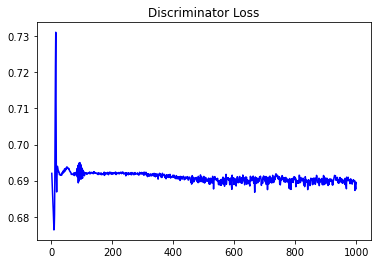

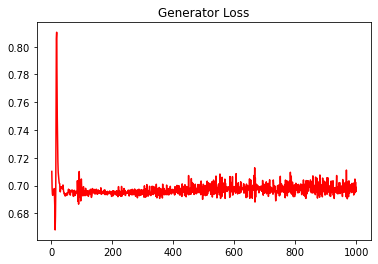

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13009829153663877


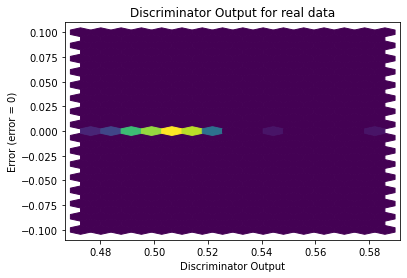

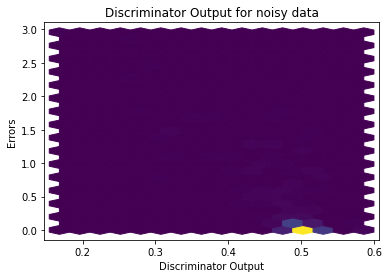

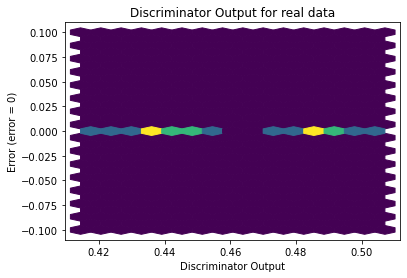

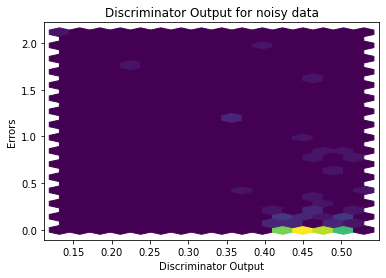

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


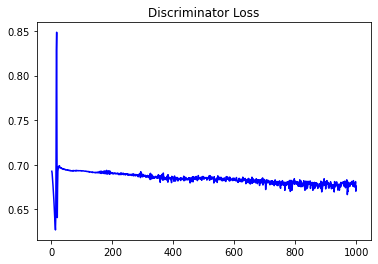

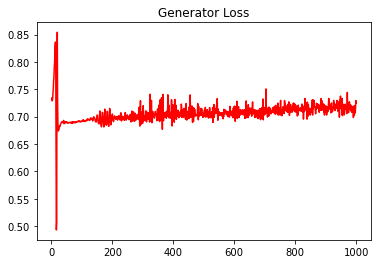

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18815723538637924


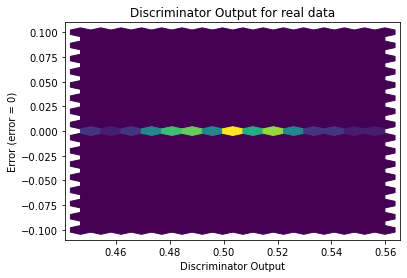

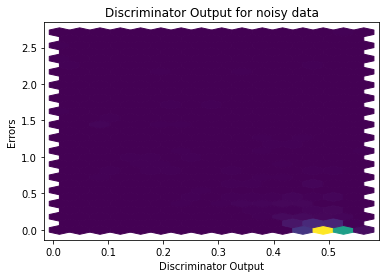

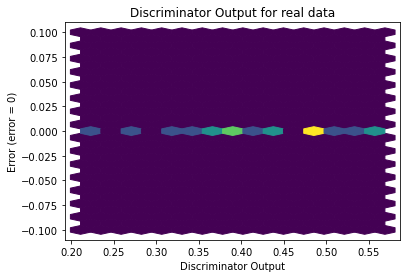

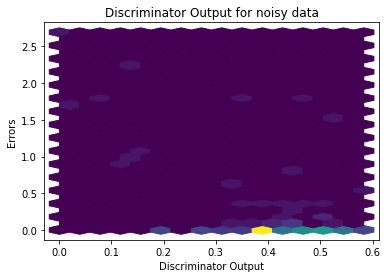

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1136]], requires_grad=True)
